In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
marketing = pd.read_csv('data/marketing.csv')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [61]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [62]:
# print the number of non-missing values and the data type of all columns in marketing
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [63]:
print(marketing.is_retained.dtype)

object


In [141]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')
print(marketing.is_retained.dtype)

bool


In [65]:
# Mapping for subscribing_channel
print(marketing.subscribing_channel.unique())
channel_dict = {'House Ads':1,'Email':4, 'Push':5, 'Facebook':3, 'Instagram':2}
marketing.subscribing_channel = marketing.subscribing_channel.map(channel_dict)
print(marketing.subscribing_channel.unique())

['House Ads' 'Email' 'Push' 'Facebook' 'Instagram' nan]
[ 1.  4.  5.  3.  2. nan]


In [142]:
# Add the new column is_correct_lang : conveys whether the ad was shown to the user in their preferred language
marketing['is_correct_lang'] = np.where(marketing.language_preferred == marketing.language_displayed,'Yes','No')
marketing.is_correct_lang

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
10032    Yes
10033    Yes
10034    Yes
10035    Yes
10036    Yes
Name: is_correct_lang, Length: 10037, dtype: object

In [143]:
# converting date columns to datetime 
for i in ['date_served','date_subscribed','date_canceled']:
    marketing[i] = pd.to_datetime(marketing[i])

In [144]:
# Add Day of Week column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,Yes,0.0


 Determine how many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month.

In [69]:
daily_users = marketing.groupby('date_served')['user_id'].nunique()
print(daily_users.head(5))

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


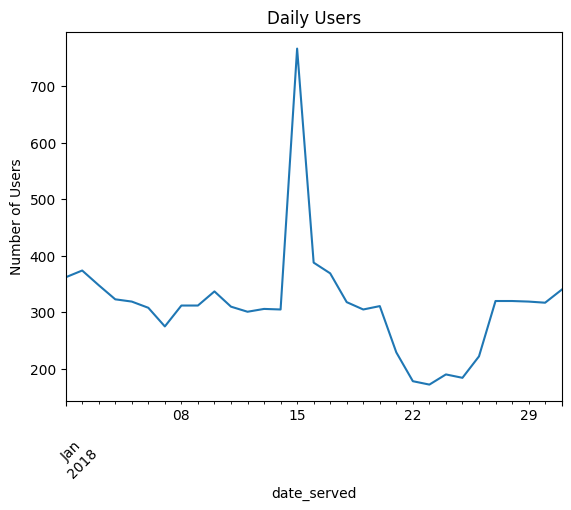

In [70]:
# plot daily_user
daily_users.plot()
plt.title('Daily Users')
plt.ylabel('Number of Users')

# Rotate the X-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.show()


On marketing teams, conversion rate is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.

As a reminder, conversion rate is the percentage of the users who saw our marketing assets and subsequently became subscribers.

In [71]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing.loc[marketing.converted == True,'user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total

print(round(conversion_rate*100,2),'%')

13.89 %


### Calculating retention rate
    you will calculate the retention rate, or the number of remaining subscribers from the users who converted to your product. This can give you a sense of whether your marketing campaign converted subscribers who were actually interested in the product.

    Conversion rate and retention rate function hand-in-hand; you could create a business with a high conversion rate by giving users a free trial, but have a low retention rate once users are charged for your services. This isn't inherently a bad thing, but it is important to provide your business stakeholders with insight into what percentage of users remain subscribers.




In [72]:
# Calculate the number of subscribers
retained = marketing.loc[marketing.is_retained == True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/subscribers
print(round(retention_rate*100,2),'%')

686.4 %


In [81]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [82]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [100]:
# Daily conversion rate
total = marketing.groupby('date_served').user_id.nunique()
subscribers = marketing.loc[marketing.converted==True].groupby('date_served').user_id.nunique()
# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate[:10])


date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
Name: user_id, dtype: float64


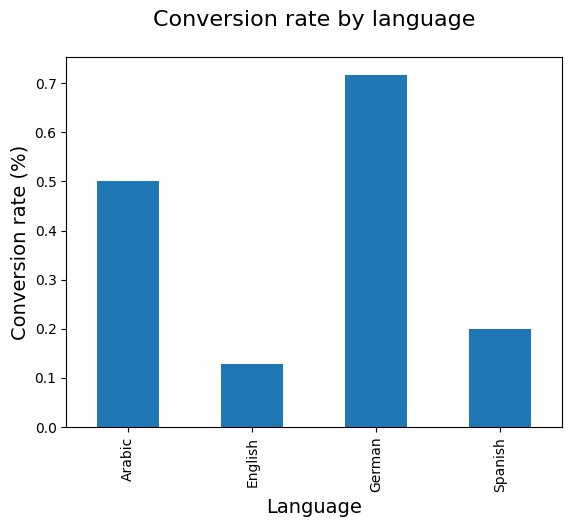

In [94]:
# visualizing conversion rate by language
language_conversion_rate.plot(kind='bar')
# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

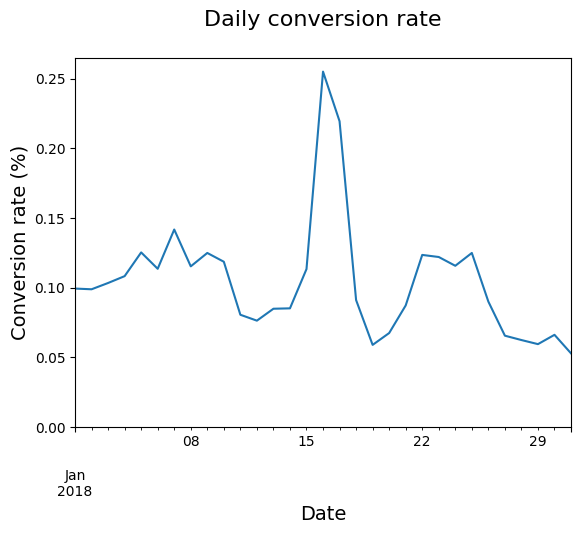

In [99]:
daily_conversion_rate.index
daily_conversion_rate.plot()
plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

age_group          0-18 years  19-24 years  24-30 years  30-36 years  \
marketing_channel                                                      
Email                      93          111          120           60   
Facebook                  264          347          296          249   
House Ads                 694          761          681          699   
Instagram                 300          315          286          259   
Push                      186          145          183           86   

age_group          36-45 years  45-55 years  55+ years  
marketing_channel                                       
Email                       63           65         53  
Facebook                   226          299        179  
House Ads                  589          678        631  
Instagram                  280          227        204  
Push                       193           82        118  
Index(['Email', 'Facebook', 'House Ads', 'Instagram', 'Push'], dtype='object', name='marketing_c

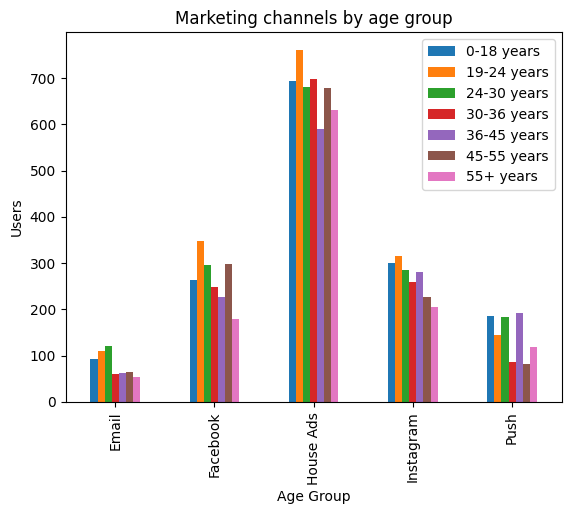

In [109]:
# create a grouped bar chart showing how many people each marketing channel reached by age group.
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()


# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
print(channel_age_df)
print(channel_age_df.index)
print(channel_age_df.columns)


# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

  marketing_channel    age_group  user_id
0             Email   0-18 years       93
1             Email  19-24 years      111
2             Email  24-30 years      120
3             Email  30-36 years       60
4             Email  36-45 years       63


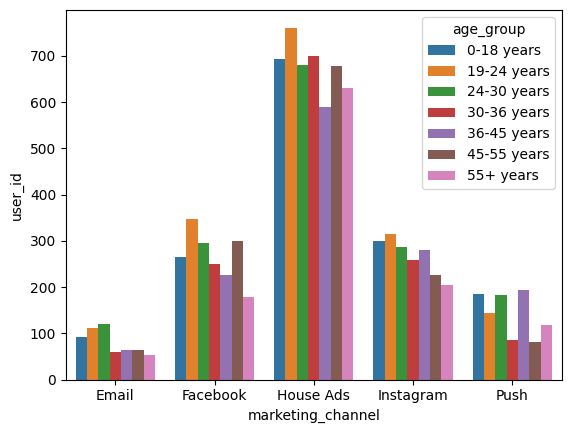

In [125]:
# another way to plot barplot
df = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count().reset_index()
print(df.head())
sns.barplot(x='marketing_channel',y='user_id',hue='age_group',data=df)
plt.show()

In [128]:
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       1.0                    16
                 2.0                     8
                 3.0                     8
                 4.0                     1
                 5.0                     3
Name: user_id, dtype: int64


In [130]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
                                    

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       1.0                    11
                 2.0                     6
                 3.0                     7
                 4.0                     1
                 5.0                     3
Name: user_id, dtype: int64


In [135]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate

date_subscribed  subscribing_channel
2018-01-01       1.0                    0.687500
                 2.0                    0.750000
                 3.0                    0.875000
                 4.0                    1.000000
                 5.0                    1.000000
                                          ...   
2018-01-31       1.0                    0.500000
                 2.0                    0.666667
                 3.0                    0.833333
                 4.0                    1.000000
                 5.0                    0.500000
Name: user_id, Length: 155, dtype: float64

subscribing_channel       1.0       2.0       3.0   4.0       5.0
date_subscribed                                                  
2018-01-01           0.687500  0.750000  0.875000  1.00  1.000000
2018-01-02           0.588235  0.625000  1.000000  0.75  1.000000
2018-01-03           0.647059  0.909091  0.800000   NaN  0.666667
2018-01-04           0.466667  0.500000  0.666667  0.50       NaN
2018-01-05           0.500000  0.636364  0.571429  1.00  1.000000


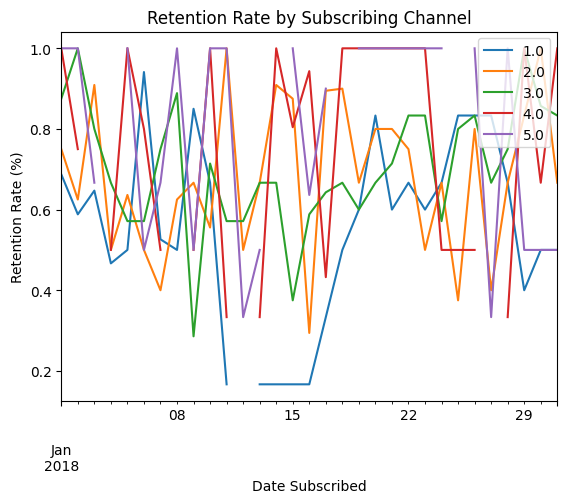

In [136]:
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))
print(retention_rate_df.head())
# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right', labels = retention_rate_df.columns)
plt.show()

In [147]:
# Function of conversion rate
def conversion_rate(df,col_name):
    col_converted = df.loc[df.converted==True].groupby(col_name).user_id.nunique()

    total = df.groupby(col_name).user_id.nunique()

    conversion_rate = col_converted/total
    
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [156]:
conversion_rate(marketing,'age_group')

age_group
0-18 years     0.158940
19-24 years    0.231829
24-30 years    0.186885
30-36 years    0.072710
36-45 years    0.069943
45-55 years    0.070888
55+ years      0.077472
Name: user_id, dtype: float64

In [145]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,Yes,0.0


In [148]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


<AxesSubplot: xlabel='date_served', ylabel='user_id'>

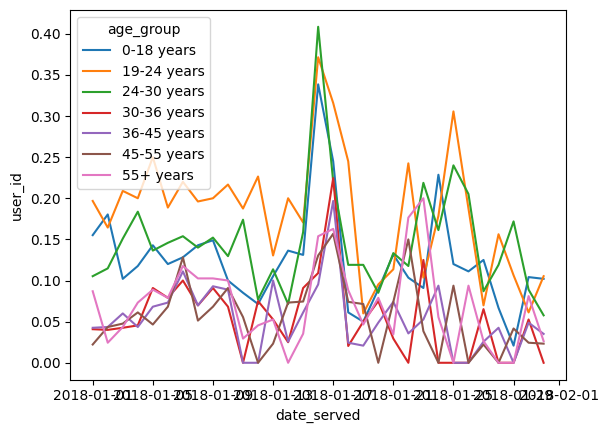

In [154]:
dd = age_group_conv.reset_index()
sns.lineplot(x='date_served',y='user_id',hue='age_group',data=dd)

In [172]:
# make lineplot function
def conversion_plot(df,col_name):
    group_conv = conversion_rate(df,col_name)
    group_conv = group_conv.reset_index()
    sns.lineplot(x=col_name[0],y='user_id',hue=col_name[1],data=group_conv)
    plt.xticks(rotation=70)
    plt.legend(loc='upper left')
    plt.show()

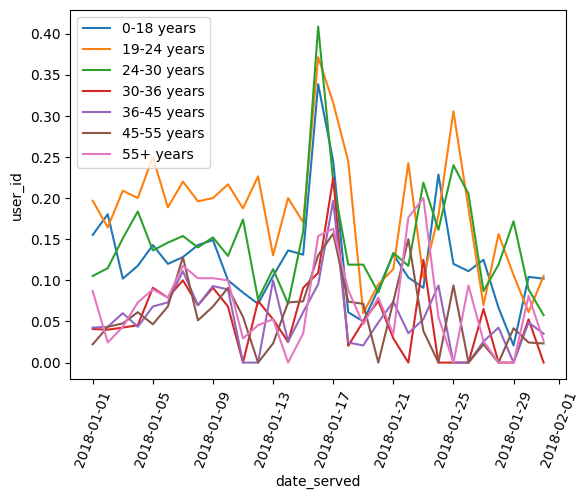

In [173]:
conversion_plot(marketing,['date_served','age_group'])

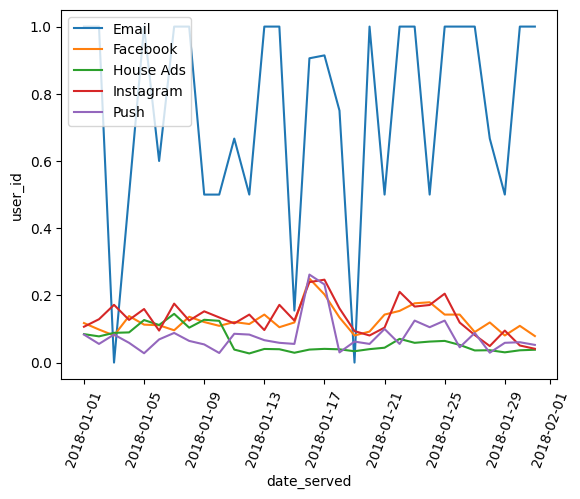

In [174]:
conversion_plot(marketing,['date_served','marketing_channel'])

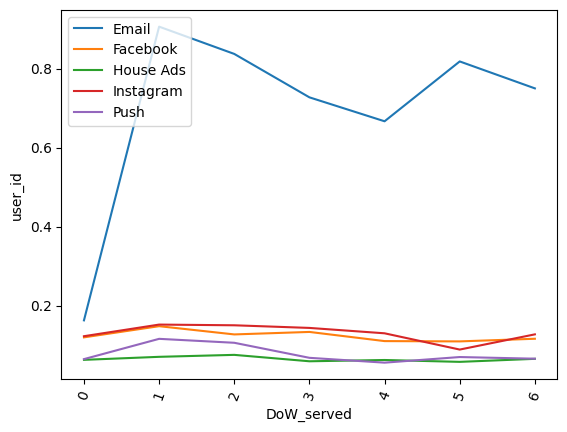

In [176]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])

# Plot conversion rate by day of week
conversion_plot(marketing, ['DoW_served', 'marketing_channel'])


    email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday. 

ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

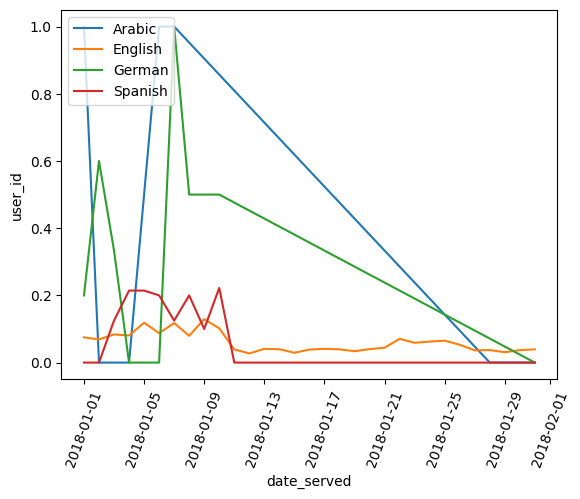

In [177]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

conversion_plot(house_ads,['date_served','language_displayed'])

### A/B Testing for marketing

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

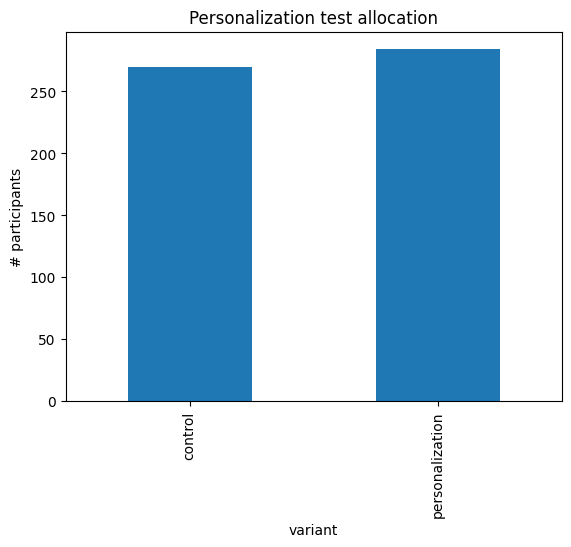

In [178]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

    There's a slight difference in allocation, but it's within the expected range 

    Comparing conversion rates
    Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control.

In [219]:
email.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_correct_lang,DoW,DoW_served
354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,2018-01-01,NaT,Email,True,Yes,0.0,0.0
358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,2018-01-05,NaT,Email,True,Yes,4.0,4.0
362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,2018-01-09,NaT,Email,True,Yes,1.0,1.0


In [220]:
# Comparing conversion rates
control_conversionRate = email.groupby(['user_id','variant'])['converted'].max().unstack(level=1).control.dropna().mean()
personalization_conversionRate = email.groupby(['user_id','variant'])['converted'].max().unstack(level=1).personalization.dropna().mean()
print('Control conversion rate:', control_conversionRate)
print('Personalization conversion rate:', personalization_conversionRate)

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [235]:
# control group
control = email.groupby(['user_id','variant'])['converted'].max().unstack(level=1).control.dropna()

# personalization group
personalization = email.groupby(['user_id','variant'])['converted'].max().unstack(level=1).personalization.dropna()

In [236]:
# Creating a lift function
def lift(control_series,treatment_series):
    mean_control_series = np.mean(control_series)
    mean_treatment_series = np.mean(treatment_series)

    lift = (mean_treatment_series-mean_control_series)/mean_control_series
    return str(round(lift*100,2)) + '%'

In [237]:
print(lift(control,personalization))

38.85%


    there's a large lift, but are your results statistically significant? 


## Evaluating statistical significance
    Now that you know the personalization variant outperformed the control, it's time for you to determine whether the result is statistically significant. Remember, statistical significance is vital to understanding whether a test showed a positive result by chance or if it is reflective of a true difference between the variants. This will enable your marketing team to make an informed choice about whether to roll out the feature or not.

A t-test is a statistical test that is used to determine whether there is a significant difference between the means of two groups. It is commonly used to evaluate the results of experiments in which a control group is compared to a treatment group, in order to determine whether the treatment had a significant effect on the outcome of the experiment.

To perform a t-test, you first need to collect data from both the control and treatment groups. This data should be numerical and should represent the same type of measurement (e.g. height, weight, time, etc.) for each individual in the groups.

Next, you need to calculate the means and standard deviations of the data for each group. This will allow you to compare the groups and determine whether there is a statistically significant difference between them.

To do this, you can use the following formula to calculate the t-statistic:

t = (mean1 - mean2) / √((SD1^2 / n1) + (SD2^2 / n2))

where mean1 and mean2 are the means of the data for the control and treatment groups, respectively, SD1 and SD2 are the standard deviations of the data for the control and treatment groups, and n1 and n2 are the number of data points in the control and treatment groups, respectively.

Once you have calculated the t-statistic, you can compare it to a critical value from a t-distribution table to determine the p-value, which is the probability that the difference between the means is due to chance. If the p-value is less than a certain significance level (usually 0.05), then the difference between the means is considered to be statistically significant, and you can conclude that the treatment had a significant effect on the outcome of the experiment.

It's important to note that the t-test assumes that the data is normally distributed, and that the variances of the two groups are equal. If these assumptions are not met, then the t-test may not be the most appropriate statistical test to use. In such cases, you may need to use a different test, such as a non-parametric test, to evaluate the significance of the results.


    In this scenario, you should use an independent samples t-test. An independent samples t-test is used to compare the means of two groups that are independent of each other, which is the case in your experiment where one group receives normal emails and the other group receives personalized emails.

In [238]:
from statsmodels.stats.api import ttest_ind
t_statistic, p_value,*_ = ttest_ind(control,personalization)
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  -2.7343299447505074
p-value:  0.006451487844694177


    it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

In [255]:
# marketing.loc[(marketing['marketing_channel'] == 'Email') & (marketing['language_displayed'] == 'Arabic')]
def abTest_segmentation(segment):
    for sub_seg in np.unique(marketing[segment]):
        print(sub_seg)
        email = marketing.loc[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == sub_seg)]
        # control group
        control_ = email.groupby(['user_id','variant'])['converted'].max().unstack(level=1).control.dropna()

        # personalization group
        personalization_ = email.groupby(['user_id','variant'])['converted'].max().unstack(level=1).personalization.dropna()
        print(lift(control_,personalization_))
        print(ttest_ind(control_,personalization_),'\n\n')
        

In [251]:
email.groupby(['user_id','variant'])['converted'].max().unstack(level=1).control.dropna()

user_id
a100000687    False
a100000688     True
a100000689     True
a100000690     True
a100000691     True
              ...  
a100007288     True
a100007289     True
a100007290     True
a100007291     True
a100007293     True
Name: control, Length: 270, dtype: object

In [256]:
abTest_segmentation('language_displayed')

Arabic
50.0%
(-0.5773502691896255, 0.5795840000000001, 8.0) 


English
39.0%
(-2.2183598646203166, 0.026991701290720815, 486.0) 


German
-1.62%
(0.19100834180787177, 0.8494394170062678, 42.0) 


Spanish
166.67%
(-2.3570226039551585, 0.04015671811047753, 10.0) 




In [257]:
abTest_segmentation('age_group')

0-18 years
121.4%
(-2.966044912142211, 0.0038724494391297226, 89.0) 


19-24 years
106.24%
(-3.03179438478667, 0.0030623836114689134, 105.0) 


24-30 years
161.19%
(-3.861539544326876, 0.00018743381094867337, 114.0) 


30-36 years
-100.0%
(3.1859064644147996, 0.0023238487431765146, 58.0) 


36-45 years
-85.23%
(2.4317901279318503, 0.017975686009788286, 61.0) 


45-55 years
-72.22%
(2.065499127317933, 0.04306233968820119, 62.0) 


55+ years
-100.0%
(3.3265654564203397, 0.001635862345636044, 51.0) 


